In [1]:
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
#Importing the required libraries and tools

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    

In [4]:
#Loading the dataset

In [5]:
data = pd.read_csv(r"C:\Users\13196\Desktop\heart_disease_uci.csv")

In [6]:
#Binarize the target variable in the heart disease dataset

In [7]:
#0 represents: No heart disease
#1, 2, 3, 4 represent: Different degrees of heart disease

In [8]:
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
#Define features and target
#X is the feature of the model, y is the target of the model, that is, whether the patient is ill (0 or 1).

In [10]:
X = data.drop(columns=['id', 'dataset', 'num'])
y = data['num']

In [11]:
#Define categorical and numerical features
#Divide the features into categorical and numerical features according 
#to their data types to facilitate subsequent preprocessing.

In [12]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [13]:
#Feature preprocessing pipeline
#Clean and transform numerical and categorical variables separately.

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [15]:
#Randomly split into training and test sets in proportion.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Define multiple models and their corresponding hyperparameter grids.
#Hyperparameter search ranges were set for multiple classification models，
#and two containers were initialized to store model performance metrics and ROC curve data for later use.

In [18]:
models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'model__C': [0.1, 1, 10], 'model__solver': ['liblinear', 'lbfgs']}
    ),
    
    'K-Nearest Neighbors': (
        KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}
    ),
    
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [3, 5, 7], 'model__min_samples_split': [2, 5]}
    ),
    
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10]}
    ),
    
    'Support Vector Machine': (
        SVC(probability=True),
        {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}
    ),
    
    'Multilayer Perceptron': (
        MLPClassifier(max_iter=1000, random_state=42),
        {'model__hidden_layer_sizes': [(50,), (100,)], 'model__learning_rate': ['constant', 'adaptive']}
    ),
    
    'XGBoost': (
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        {'model__n_estimators': [50, 100], 'model__max_depth': [3, 5], 'model__learning_rate': [0.01, 0.1]}
    )
}


In [19]:
# Store results

In [20]:
results = []
roc_data = {}

In [21]:
#Batch train, tune, and evaluate multiple classification models, 
#then save and display their performance metrics.

Training model: Logistic Regression ...


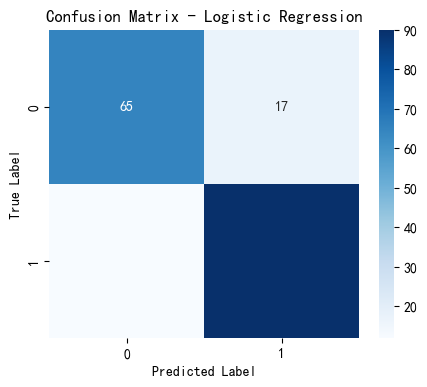

Training model: K-Nearest Neighbors ...


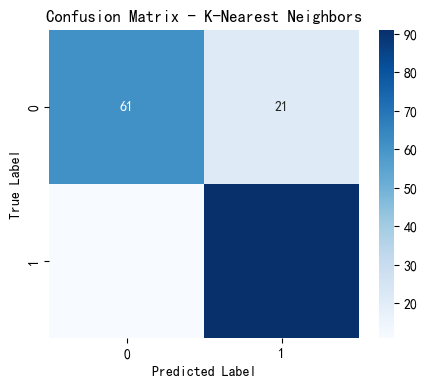

Training model: Decision Tree ...


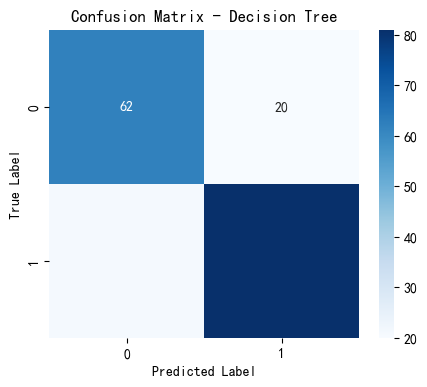

Training model: Random Forest ...


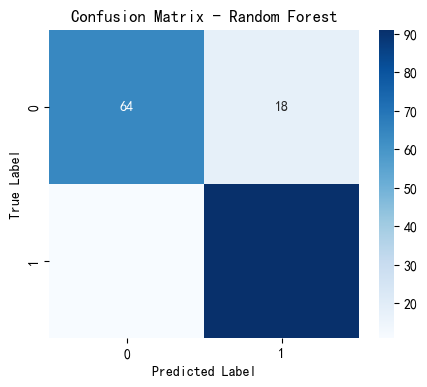

Training model: Support Vector Machine ...


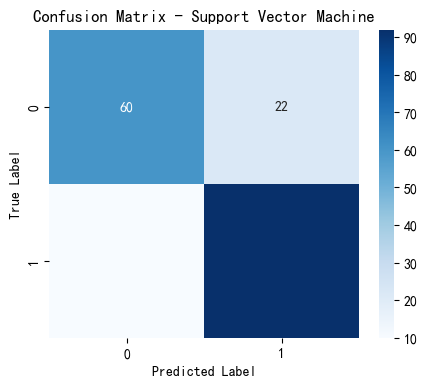

Training model: Multilayer Perceptron ...


C:\Users\13196\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


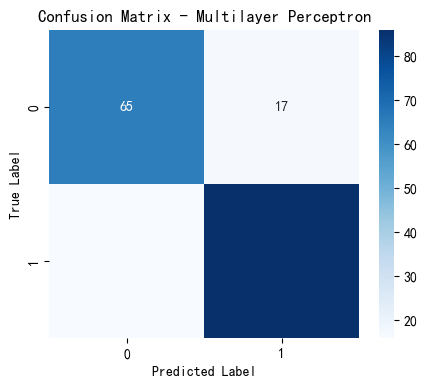

Training model: XGBoost ...


C:\Users\13196\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\13196\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\13196\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\13196\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\13

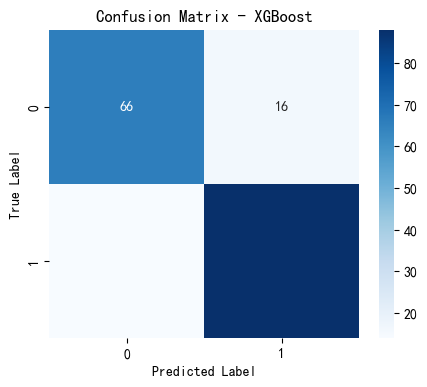

In [22]:
# Iterate through multiple models and their parameter grids:
# Process, one by one, the predefined different machine learning models and their corresponding hyperparameter ranges.
for name, (model, param_grid) in models.items():
    print(f"Training model: {name} ...")
    
    # Create a pipeline that includes data preprocessing and the model:
    # Integrate data preprocessing and model training into a single unit.
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Use 5-fold cross-validation grid search:
    # Automatically find the optimal hyperparameter combination,
    # with the goal of maximizing the F1 score.
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Use the best parameter model to make predictions on the test set:
    # Obtain predicted labels and predicted probabilities.
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate various classification performance metrics:
    # Accuracy, Precision, Recall, and F1 Score.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Save the evaluation results and best parameters for each model
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Best Parameters': grid.best_params_
    })
    roc_data[name] = (fpr, tpr, roc_auc)
    
    # Draw the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


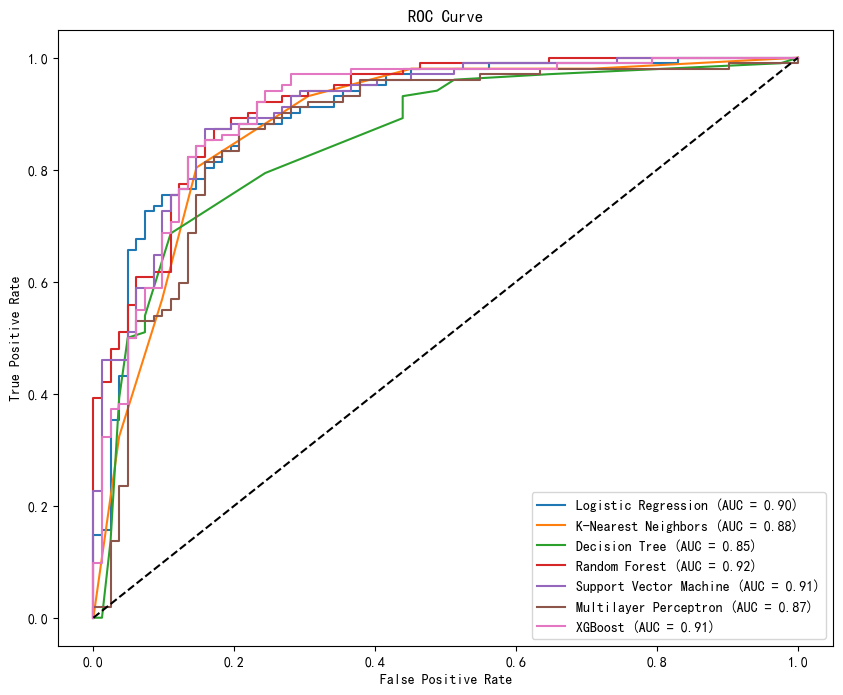


Model Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression  0.842391   0.841121  0.882353  0.861244   
1     K-Nearest Neighbors  0.826087   0.812500  0.892157  0.850467   
2           Decision Tree  0.777174   0.801980  0.794118  0.798030   
3           Random Forest  0.842391   0.834862  0.892157  0.862559   
4  Support Vector Machine  0.826087   0.807018  0.901961  0.851852   
5   Multilayer Perceptron  0.820652   0.834951  0.843137  0.839024   
6                 XGBoost  0.836957   0.846154  0.862745  0.854369   

                                     Best Parameters  
0     {'model__C': 10, 'model__solver': 'liblinear'}  
1  {'model__n_neighbors': 7, 'model__weights': 'u...  
2  {'model__max_depth': 5, 'model__min_samples_sp...  
3  {'model__max_depth': 5, 'model__n_estimators':...  
4  {'model__C': 1, 'model__gamma': 'scale', 'mode...  
5  {'model__hidden_layer_sizes': (100,), 'model__...  
6  {'model__learning_ra

In [23]:
# Draw an ROC curve.
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display the results.
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


In [24]:
#Random Forest

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])

# Train the random forest model using the training data
rf_pipeline.fit(X_train, y_train)

# Get the feature names after preprocessing (numerical + one-hot encoded categorical features)
feature_names = numerical_cols + list(
    preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols)
)

# Get feature importance scores from the trained random forest model
importances = rf_pipeline.named_steps['model'].feature_importances_

# Create a DataFrame to show features alongside their importance, sorted descendingly
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)


Feature Importance (Random Forest):
                     Feature  Importance
2                       chol    0.149731
3                     thalch    0.130159
0                        age    0.127286
4                    oldpeak    0.105350
13                exang_True    0.091405
1                   trestbps    0.075363
7         cp_atypical angina    0.074803
6                   sex_Male    0.043737
8             cp_non-anginal    0.033395
16               thal_normal    0.027856
5                         ca    0.023479
17    thal_reversable defect    0.021327
11            restecg_normal    0.019220
15           slope_upsloping    0.017459
10                  fbs_True    0.016290
14                slope_flat    0.015697
12  restecg_st-t abnormality    0.013959
9          cp_typical angina    0.013487


In [26]:
# Model Performance Comparison Chart

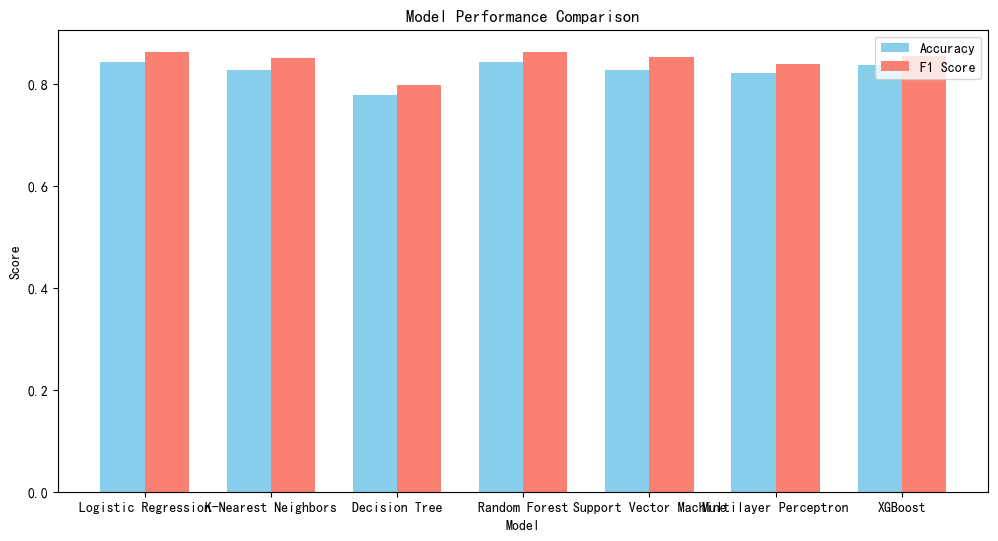

In [27]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df))

plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, results_df['F1 Score'], bar_width, label='F1 Score', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, results_df['Model'])
plt.legend()
plt.show()